In [80]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Read in data
life_gdp = pd.read_csv('all_data.csv')

# Observe first five rows of data
print(life_gdp.head())

# Print summary statistics
print(life_gdp.describe(include='all'))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
       Country         Year  Life expectancy at birth (years)           GDP
count       96    96.000000                         96.000000  9.600000e+01
unique       6          NaN                               NaN           NaN
top      Chile          NaN                               NaN           NaN
freq        16          NaN                               NaN           NaN
mean       NaN  2007.500000                         72.789583  3.880499e+12
std        NaN     4.633971                         10.672882  5.197561e+12
min        NaN  2000.000000                         44.300000  4.415703e+09
25%     

In [149]:
# Investigate which nations we have data for
print(life_gdp.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [158]:
# Abbreviate United States of America to USA for greater ease
life_gdp['Country'].mask(life_gdp['Country'] == 'United States of America','USA', inplace=True)

# Check values to make sure updated properly
print(life_gdp.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


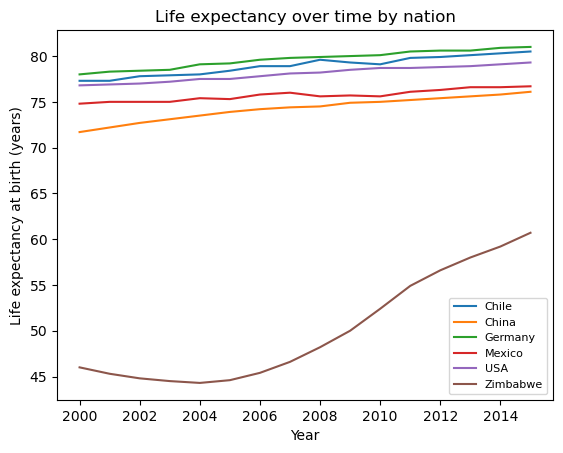

<Figure size 640x480 with 0 Axes>

In [190]:
# Create palette dictionary to maintain same color scheme as for all graphs
pallete = {
    'Zimbabwe': 'tab:brown',
    'USA': 'tab:purple',
    'Mexico': 'tab:red',
    'Germany': 'tab:green',
    'China': 'tab:orange',
    'Chile': 'tab:blue'
}

# Illustrate life expectancy over time in the six nations
sns.lineplot(x='Year', y='Life expectancy at birth (years)', hue='Country', data=life_gdp, palette=pallete)
plt.title('Life expectancy over time by nation')
plt.legend(loc=4, prop={'size': 8})
plt.show()
plt.clf()

The above graph illustrates that life expectancy has grown gradually for all the nations aside from Zimbawe which grew from ~45 to ~60 years old

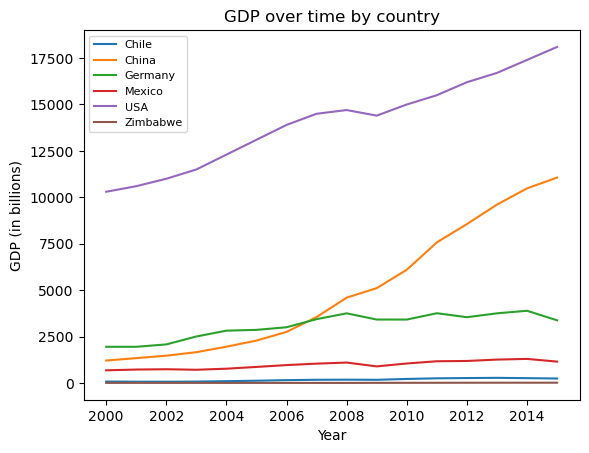

<Figure size 640x480 with 0 Axes>

In [191]:
# Adjust GDP variable to be in billions
life_gdp['GDP_adj'] = [x / 1000000000 for x in life_gdp.GDP]

# GDP over time in the six nations
sns.lineplot(x='Year',y='GDP_adj', hue='Country', data=life_gdp, palette=pallete)
plt.title('GDP over time by country')
plt.ylabel('GDP (in billions)')
plt.legend(loc=2, prop={'size': 8})
plt.show()
plt.clf()

GDP is relatively stagnant for Mexico, Chile, and Zimbabwe; has grown subtly for Germany; and has grown rapidly for China and the USA.

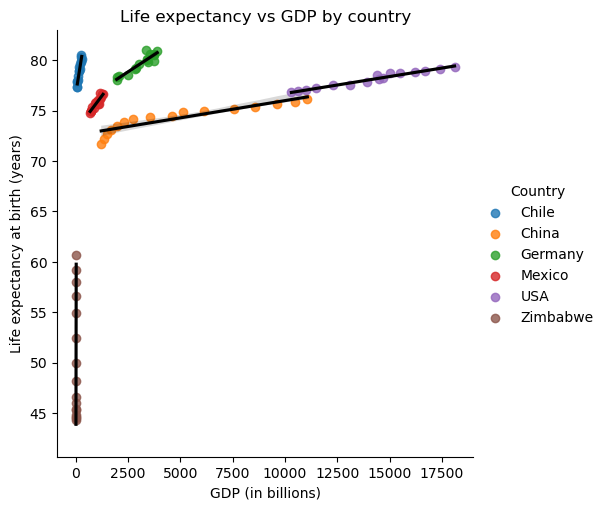

<Figure size 640x480 with 0 Axes>

In [192]:
# Illustrate relationship between GDP and life expectancy of each country
sns.lmplot(x='GDP_adj', y='Life expectancy at birth (years)', hue='Country', 
           data=life_gdp, line_kws={'color':'black'}, palette=palette)
plt.title('Life expectancy vs GDP by country')
plt.xlabel('GDP (in billions)')
plt.show()
plt.clf()

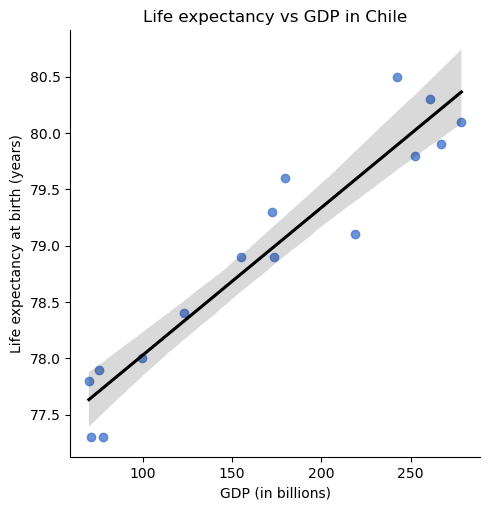

<Figure size 640x480 with 0 Axes>

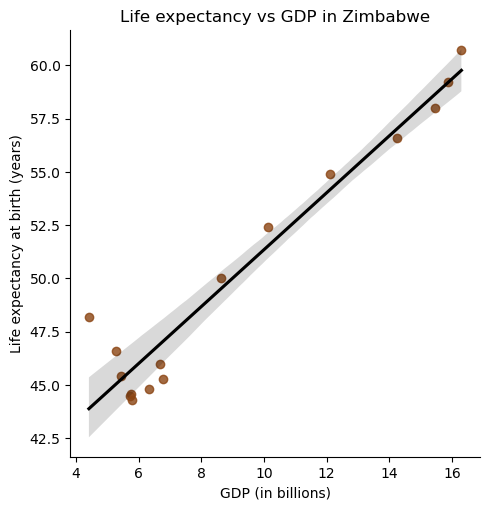

<Figure size 640x480 with 0 Axes>

In [197]:
# Closer look at Chile and Zimbabwe

# Visualization of relationship of GDP and life expectancy for Chile
sns.lmplot(x='GDP_adj', y='Life expectancy at birth (years)', hue='Country',
                data=life_gdp[life_gdp['Country']=='Chile'], legend=False, line_kws={'color':'black'})
sns.set_palette("muted")
plt.title('Life expectancy vs GDP in Chile')
plt.xlabel('GDP (in billions)')
plt.show()
plt.clf()

# Visualization of relationship of GDP and life expectancy for Zimbabwe
sns.lmplot(x='GDP_adj', y='Life expectancy at birth (years)',
           data=life_gdp[life_gdp['Country']=='Zimbabwe'], 
           scatter_kws={'color':'saddlebrown'}, line_kws={'color':'black'})
plt.title('Life expectancy vs GDP in Zimbabwe')
plt.xlabel('GDP (in billions)')
plt.show()
plt.clf()

For the 6 countries, there is generally a positive correlation between GPD and life expectancy.

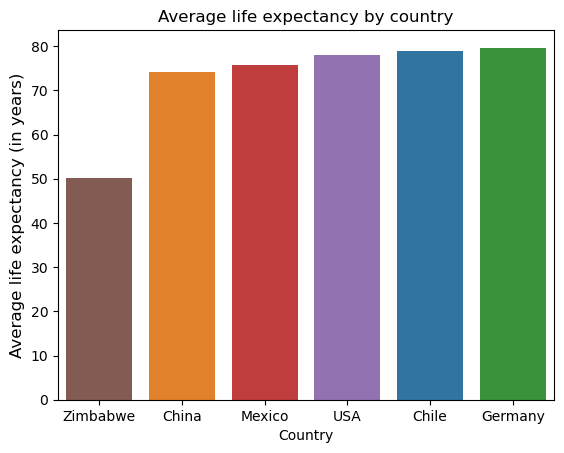

<Figure size 640x480 with 0 Axes>

In [198]:
# Average life expectancy per nation
avg_life = life_gdp.groupby(['Country'])['Life expectancy at birth (years)'].mean().sort_values()

# Bar chart to illustrate average life expectancy per nation 
sns.barplot(x=avg_life.index, y=avg_life.values, palette=palette)
plt.ylabel('Average life expectancy (in years)', fontsize=12)
plt.title('Average life expectancy by country')
plt.show()
plt.clf()

From 2000-2015, average life expectancy was around 75-80 years for all countries aside from Zimbabwe, which was around 50 years.

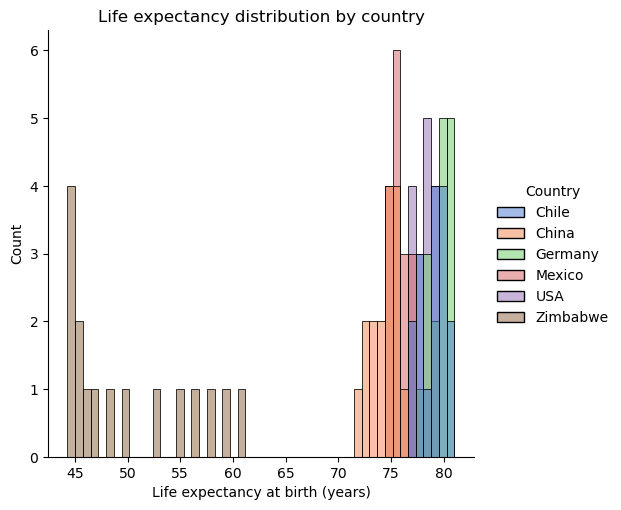

<Figure size 640x480 with 0 Axes>

In [199]:
# Illustrate the distribution of that life expectancy
sns.displot(x='Life expectancy at birth (years)', data=life_gdp, hue='Country', bins=50, alpha=0.5)
plt.title('Life expectancy distribution by country')
plt.show()
plt.clf()

Most countries' life expectancies are clustered around the 75 year mark, while Zimbabwe has a much larger spread ranging from ~45 to ~60 years in life expectancy.